#### 로지스틱 회귀
타이타닉 생존자 예측하기
로지스틱 회귀 또한 선형 회귀처럼 기본 분석 모델이다.

알고리즘 근간을 선형 회귀 분석에 두고 있어서 선형 회귀 분석과 매우 유사하지만, 

연속된 변수를 예측하는 선형 회귀 분석과 달리, Yes/No와 같은 두 가지로 나뉘는 분류 문제를 다룬다.

- 장점 : 계수(기울기)를 활용해 각 변수의 중요성을 쉽게 파악할 수 있다.

- 단점 : 선형 회귀 분석을 근간으로 하고 있기 때문에, 선형 관계가 아닌 데이터에 대한 예측력은 떨어진다.

#### 라이브러리 및 데이터 불러오기

In [43]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

#### 데이터 확인하기

In [2]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [7]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [14]:
# 상관관계 출력 
# 데이터 타입 object를 제외하고, 계산한다.
# 상관관계는 절대값이 클수록 강하다

correlation = data.corr(numeric_only=True)
correlation


,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


<Axes: >

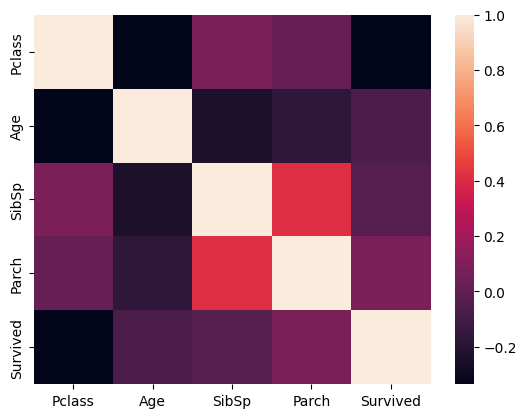

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(5,5)) # ❶ 그래프 크기를 정의
sns.heatmap(correlation)

<Axes: >

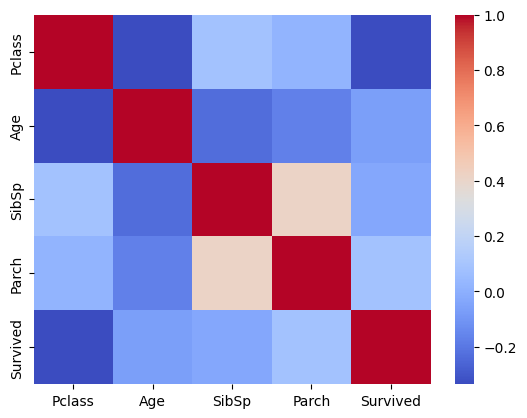

In [21]:
# 0을 기준으로, 대칭이 되는 색상 배열 사용

sns.heatmap(correlation, cmap='coolwarm')

입력된 수치가 1부터 -0.5까지라서, 그래프를 -1에서 1까지로 조정해 색상 밸런스를 맞춰야한다.

상관 관계 수치도 표현하고 싶다.

-> 개선

<Axes: >

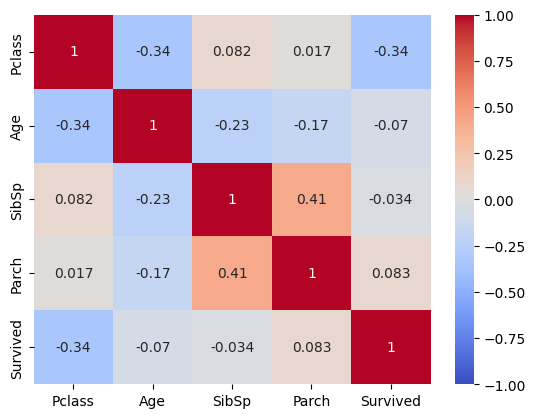

In [22]:
sns.heatmap(correlation, cmap='coolwarm', vmin=-1, vmax=1, annot=True)

#### 전처리 - 카테고리 변수 중 문자를 숫자로 변환하기
= `더미 변수` = `원-핫 인코딩`

데이터 타입이 object 이었던, 즉 문자였던 변수 4개에 대해, 숫자로 변환하여 계산해야한다.

`nunique()` 를 활용하여 고유값 개수를 확인 가능하다. 값 종류만큼 칼럼을 만들 수는 없다.. 그럼 어떻게 해야하지?

In [25]:
data['Name'].nunique()

889

In [29]:
data['Embarked'].nunique()

3

In [30]:
data['Sex'].nunique()

2

In [27]:
data['Ticket'].nunique()

680


우선, 변수들이 결과를 도출하는데 꼭 필요한 것인지 생각해야한다. 예를 들어, 이름에 따라 사망 여부를 판단하기는 어려우니 이름 칼럼을 제외할 수 있다.

티켓 번호 또한 티켓 클래스로 구분이 가능하기 때문에, 제외 가능하다.

-> 이름과 티켓 번호 칼럼은 제외한다.

In [44]:
data = data.drop(['Name','Ticket'], axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


get_dummies() 함수를 사용하여, 문자 형태의 변수를 원-핫 인코딩하자

In [45]:
pd.get_dummies(data, columns = ['Sex','Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


<!-- Sex_female, Sex_male 둘 중 하나만 남겨도 된다. 또한 Embarked도 3개 중 두개만 필요하다 

= 계산량을 줄이는 방법 -->

In [46]:
# 데이터에 원 핫 인코딩 결과 저장

data = pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)
data

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [48]:
# object 결과 모두 없어짐!

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Survived    889 non-null    int64  
 5   Sex_male    889 non-null    bool   
 6   Embarked_Q  889 non-null    bool   
 7   Embarked_S  889 non-null    bool   
dtypes: bool(3), float64(1), int64(4)
memory usage: 37.5 KB


#### 모델링 및 예측하기

1. 데이터를 독립 변수와 종속 변수, 훈련 셋과 테스트 셋으로 나눈다.

2. 모델을 학습시킨다.

3. 피처 엔지니어링 진행

4. 에측 모델을 평가한다.

In [49]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### 모델 예측

In [51]:
pred = model.predict(X_test)

모델 예측 결과 평가하기

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

In [54]:
# 독립변수 5개에 대한 계수 (각 변수에 대한 기울기값 = 계수)

model.coef_

array([[-1.18186409, -0.03990391, -0.32076847,  0.00804799, -2.56835452,
        -0.07488717, -0.23731591]])

In [57]:
# 변수 이름을 포함하는 pandas로 변경하여 계수 출력
# model.coef_의 값은 이중 리스트였음

pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.181864
Age          -0.039904
SibSp        -0.320768
Parch         0.008048
Sex_male     -2.568355
Embarked_Q   -0.074887
Embarked_S   -0.237316
dtype: float64

In [58]:
# y 절편

model.intercept_

array([5.26947193])

#### 피처 엔지니어링

- 기존 데이터를 손보아, 더 나은 변수를 만드는 일
- 더미 변수를 만든 일도 일종의 피처 엔지니어링이었음

- 피처 엔지니어링에서는 도메인 지식의 활용이 굉장히 중요하다. 어떤 변수를 바꾸면 더 나은 피처를 얻을 수 있을지 생각해야한다..!

- 선형 모델(선형회귀 분석과 로지스틱 회귀 분석)에서는 다중 공선성 문제를 주의해야한다.
- 독립 변수 중에 상관 관계가 높을 때 발생하는 문제이다.

- 상관관계가 높은 A, B가 있을 때 종속 변수의 증가 이유가 A인지, B인지 예측하기 어려울 때
- 상관 관계가 높은 변수 중 하나를 제거하거나, 둘을 모두 포괄시키는 새로운 변수를 만들거나,
- PCA와 같은 방법을 차원 축소를 통해 해결 가능하다.

PCA는 Principal Component Analysis의 약자로, 주성분 분석이라고 부른다.
차원 축소는 데이터의 차원, 즉 독립 변수의 개수를 줄이는 방법을 뜻한다.

- Parch는 부모와 자식, SibSp는 형제 자매와 배우자로, 모두 가족 구성원이라는 공통점이 있다.

family라는 칼럼을 만들고, 두 칼럼을 제거한다.

In [59]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'], axis=1, inplace=True)

In [60]:
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


새로운 칼럼을 만들었으므로, 모델링 과정과 평가까지 다시 진행한다.

In [61]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

모델의 정확성이 0.78에서 0.79로 증가했다.

여기에서는 0.5를 기준으로 0과 1로 분류했다.

그러나 다른 기준값을 대상으로 분류도 가능하다.

LightGBM을 활용해 0.5가 아닌 다른 기준값으로 분류하는 실습도 가능하다.